In [1]:
import pandas as pd
import numpy as np
import datetime
# import yfinance as yf

In [2]:
# Replace 'your_file_path.csv' with the actual path to your CSV file
csv_file_path = 'KLCI.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Print the DataFrame to verify the changes
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Earnings
0,^KLSE,1994-12-30,967.80,977.68,967.80,971.21,971.21,NaN,NaN
1,^KLSE,1995-01-03,970.84,977.64,968.87,969.70,969.70,NaN,NaN
2,^KLSE,1995-01-04,969.51,969.51,956.13,957.81,957.81,NaN,NaN
3,^KLSE,1995-01-05,958.52,965.89,958.52,965.89,965.89,NaN,NaN
4,^KLSE,1995-01-06,966.37,966.51,955.43,955.43,955.43,15981000.0,NaN


In [3]:
start_date1 = pd.to_datetime("2006-01-01")
end_date1 = pd.to_datetime("2011-01-01")
filtered_data1 = df[(df["Date"] >= start_date1) & (df["Date"] < end_date1)]

start_date2 = pd.to_datetime("2016-01-01")
end_date2 = pd.to_datetime("2022-01-01")
filtered_data2 = df[(df["Date"] >= start_date2) & (df["Date"] < end_date2)]

all_data = pd.concat([filtered_data1,filtered_data2])
all_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Earnings
2710,^KLSE,2006-01-03,899.18,899.85,891.04,892.85,892.85,24042600.0,NaN
2711,^KLSE,2006-01-04,893.09,897.88,892.63,897.13,897.13,44177800.0,NaN
2712,^KLSE,2006-01-05,897.34,908.71,897.34,906.66,906.66,85141700.0,NaN
2713,^KLSE,2006-01-06,906.60,912.07,906.60,911.67,911.67,89850300.0,NaN
2714,^KLSE,2006-01-09,913.65,916.00,912.40,913.80,913.80,101700900.0,NaN


In [4]:
all_data.set_index(['Ticker', 'Date'], inplace=True)
all_data.head()

Open    High     Low   Close  Adj Close       Volume  \
Ticker Date                                                                 
^KLSE  2006-01-03  899.18  899.85  891.04  892.85     892.85   24042600.0   
       2006-01-04  893.09  897.88  892.63  897.13     897.13   44177800.0   
       2006-01-05  897.34  908.71  897.34  906.66     906.66   85141700.0   
       2006-01-06  906.60  912.07  906.60  911.67     911.67   89850300.0   
       2006-01-09  913.65  916.00  912.40  913.80     913.80  101700900.0   

                   Earnings  
Ticker Date                  
^KLSE  2006-01-03       NaN  
       2006-01-04       NaN  
       2006-01-05       NaN  
       2006-01-06       NaN  
       2006-01-09       NaN

In [5]:
# def get(tickers, startdate, enddate):
#     datas = [yf.download(ticker, start=startdate, end=enddate) for ticker in tickers]
#     return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

# tickers = ['^KLSE']
# # all_data = get(tickers, datetime.datetime(2001, 1, 1), datetime.datetime(2021, 1, 1))
# all_data1 = get(tickers, datetime.datetime(2006, 1, 1), datetime.datetime(2011, 1, 1))
# all_data2 = get(tickers, datetime.datetime(2016, 1, 1), datetime.datetime(2022, 1, 1))


In [6]:
# all_data = pd.concat([all_data1,all_data2])
# all_data

In [7]:
# Assuming you have already fetched the data and created the 'all_data' DataFrame

# Check for null values in the 'Volume' column
null_volume = all_data['Volume'].isnull()

# Check for zero values in the 'Volume' column
zero_volume = all_data['Volume'] == 0

# Print the rows with null or zero values in the 'Volume' column
rows_with_null_or_zero = all_data[null_volume | zero_volume]
rows_with_null_or_zero.head()
# rows_with_null_or_zero.to_excel('null_Volume.xlsx', index=True)

,,Open,High,Low,Close,Adj Close,Volume,Earnings
Ticker,Date,,,,,,,
^KLSE,2008-07-04,1127.89,1138.03,1119.97,1134.14,1134.14,0.0,NaN


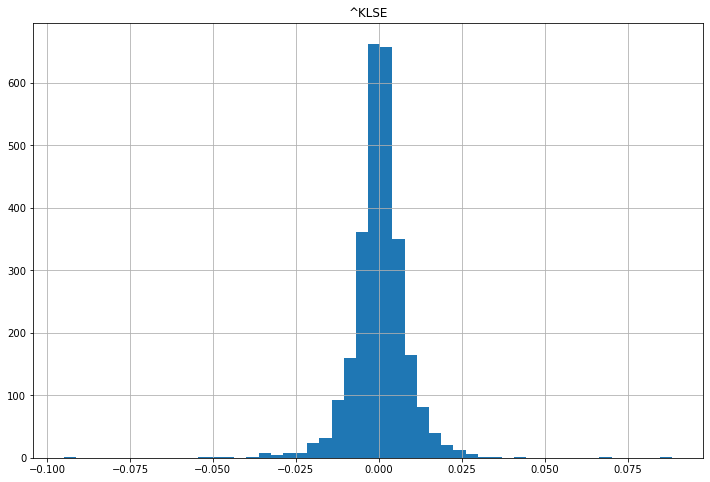

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [10]:
datas=all_data

In [11]:
# Initialize the `signals` DataFrame with the `signal` column
datas['signal'] = 0.0

# Create short simple moving average over the short window
datas['short_mavg'] = datas['Close'].rolling(window=30, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
datas['long_mavg'] = datas['Close'].rolling(window=120, min_periods=1, center=False).mean()

# Create signals
datas['signal'] = np.where(datas['short_mavg'] > datas['long_mavg'], 1.0, 0.0)

In [12]:
datas

Open     High      Low    Close  Adj Close       Volume  \
Ticker Date                                                                     
^KLSE  2006-01-03   899.18   899.85   891.04   892.85     892.85   24042600.0   
       2006-01-04   893.09   897.88   892.63   897.13     897.13   44177800.0   
       2006-01-05   897.34   908.71   897.34   906.66     906.66   85141700.0   
       2006-01-06   906.60   912.07   906.60   911.67     911.67   89850300.0   
       2006-01-09   913.65   916.00   912.40   913.80     913.80  101700900.0   
...                    ...      ...      ...      ...        ...          ...   
       2021-12-27  1517.37  1535.93  1515.10  1533.91    1533.91  110161500.0   
       2021-12-28  1535.98  1542.20  1535.86  1539.89    1539.89  115107800.0   
       2021-12-29  1540.39  1545.04  1536.45  1545.04    1545.04  115519200.0   
       2021-12-30  1544.73  1547.75  1539.57  1543.61    1543.61  105401000.0   
       2021-12-31  1542.99  1567.53  1531.81  1567.53    1567.53  165322800.0   

                   Earnings  signal   short_mavg    long_mavg  
Ticker Date                                                    
^KLSE  2006-01-03       NaN     0.0   892.850000   892.850000  
       2006-01-04       NaN     0.0   894.990000   894.990000  
       2006-01-05       NaN     0.0   898.880000   898.880000  
       2006-01-06       NaN     0.0   902.077500   902.077500  
       2006-01-09       NaN     0.0   904.422000   904.422000  
...                     ...     ...          ...          ...  
       2021-12-27  104.3932     0.0  1506.990000  1533.780000  
       2021-12-28  104.3932     0.0  1507.575000  1533.834500  
       2021-12-29  104.3932     0.0  1508.313333  1533.940167  
       2021-12-30  104.3932     0.0  1508.929333  1534.040000  
       2021-12-31  104.3932     0.0  1510.387333  1534.351500  

[2705 rows x 10 columns]

In [13]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
datas['EMA21'] = EMA(datas, 21)
datas['EMA63'] = EMA(datas, 63)
datas['EMA252'] = EMA(datas, 252)
datas.head()

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
datas['ROC21'] = ROC(datas['Close'], 21)
datas['ROC63'] = ROC(datas['Close'], 63)

#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM
datas['MOM21'] = MOM(datas['Close'], 21)
datas['MOM63'] = MOM(datas['Close'], 63)

#calculation of relative strength index
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
 #rs = pd.stats.moments.ewma(u, com=period-1, adjust=False)
    rs=pd.DataFrame.ewm(u,com=period-1,adjust=False).mean() 
    pd.DataFrame.ewm(d,com=period-1,adjust=False).mean()
#pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + (rs))

datas['RSI21'] = RSI(datas['Close'], 21)
datas['RSI63'] = RSI(datas['Close'], 63)
datas['RSI252'] = RSI(datas['Close'], 252)

#calculation of stochastic osillator.

def STOK(close, low, high, n): 
    STOK = ((close - low.rolling(n).mean()) / (high.rolling(n).mean() - low.rolling(n).mean())) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).mean()) / (high.rolling(n).mean() - low.rolling(n).mean())) * 100
    STOD = STOK.rolling(3).mean()
    return STOD

datas['%K21'] = STOK(datas['Close'], datas['Low'], datas['High'], 21)
datas['%D21'] = STOD(datas['Close'], datas['Low'], datas['High'], 21)
datas['%K63'] = STOK(datas['Close'], datas['Low'], datas['High'], 63)
datas['%D63'] = STOD(datas['Close'], datas['Low'], datas['High'], 63)
datas['%K252'] = STOK(datas['Close'], datas['Low'], datas['High'], 252)
datas['%D252'] = STOD(datas['Close'], datas['Low'], datas['High'], 252)


In [14]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
datas['MA21'] = MA(datas, 21)
datas['MA63'] = MA(datas, 63)
datas['MA252'] = MA(datas, 252)
datas.tail()

Open     High      Low    Close  Adj Close       Volume  \
Ticker Date                                                                     
^KLSE  2021-12-27  1517.37  1535.93  1515.10  1533.91    1533.91  110161500.0   
       2021-12-28  1535.98  1542.20  1535.86  1539.89    1539.89  115107800.0   
       2021-12-29  1540.39  1545.04  1536.45  1545.04    1545.04  115519200.0   
       2021-12-30  1544.73  1547.75  1539.57  1543.61    1543.61  105401000.0   
       2021-12-31  1542.99  1567.53  1531.81  1567.53    1567.53  165322800.0   

                   Earnings  signal   short_mavg    long_mavg  ...     RSI252  \
Ticker Date                                                    ...              
^KLSE  2021-12-27  104.3932     0.0  1506.990000  1533.780000  ...  81.496240   
       2021-12-28  104.3932     0.0  1507.575000  1533.834500  ...  81.517624   
       2021-12-29  104.3932     0.0  1508.313333  1533.940167  ...  81.527642   
       2021-12-30  104.3932     0.0  1508.929333  1534.040000  ...  81.467686   
       2021-12-31  104.3932     0.0  1510.387333  1534.351500  ...  81.730009   

                         %K21        %D21        %K63        %D63       %K252  \
Ticker Date                                                                     
^KLSE  2021-12-27  330.784858  240.647348   54.106139  -45.207954 -189.268182   
       2021-12-28  373.912356  300.739507  103.026431   21.084789 -142.189412   
       2021-12-29  413.497605  372.731606  147.194461  101.442344 -101.065620   
       2021-12-30  390.088150  392.499370  135.514993  128.578628 -109.235008   
       2021-12-31  532.807948  445.464568  333.766738  205.492064   69.112346   

                        %D252         MA21         MA63        MA252  
Ticker Date                                                           
^KLSE  2021-12-27 -276.816107  1500.018571  1533.669048  1566.627619  
       2021-12-28 -217.055586  1501.336190  1533.777619  1566.066032  
       2021-12-29 -144.174404  1502.977619  1533.749365  1565.552897  
       2021-12-30 -117.496680  1504.388571  1533.685238  1565.120833  
       2021-12-31  -47.062760  1507.750476  1534.157143  1564.801944  

[5 rows x 29 columns]

In [15]:
#Dealing with rows that contain NAN

print(datas.isnull().sum())
datasub=datas.dropna()
datasub.isnull().sum()
datasub

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Earnings      695
signal          0
short_mavg      0
long_mavg       0
EMA21          20
EMA63          62
EMA252        251
ROC21          20
ROC63          62
MOM21          21
MOM63          63
RSI21          21
RSI63          63
RSI252        252
%K21           20
%D21           22
%K63           62
%D63           64
%K252         251
%D252         253
MA21           20
MA63           62
MA252         251
dtype: int64


Open     High      Low    Close  Adj Close       Volume  \
Ticker Date                                                                     
^KLSE  2008-10-28   837.69   837.69   801.27   832.44     832.44  512472000.0   
       2008-10-29   850.25   850.25   821.75   829.41     829.41  466909900.0   
       2008-10-30   830.44   857.85   826.91   853.56     853.56  359169600.0   
       2008-10-31   848.60   869.32   848.60   863.61     863.61  551642400.0   
       2008-11-03   867.04   900.18   867.04   899.35     899.35  485047400.0   
...                    ...      ...      ...      ...        ...          ...   
       2021-12-27  1517.37  1535.93  1515.10  1533.91    1533.91  110161500.0   
       2021-12-28  1535.98  1542.20  1535.86  1539.89    1539.89  115107800.0   
       2021-12-29  1540.39  1545.04  1536.45  1545.04    1545.04  115519200.0   
       2021-12-30  1544.73  1547.75  1539.57  1543.61    1543.61  105401000.0   
       2021-12-31  1542.99  1567.53  1531.81  1567.53    1567.53  165322800.0   

                   Earnings  signal   short_mavg    long_mavg  ...     RSI252  \
Ticker Date                                                    ...              
^KLSE  2008-10-28   49.5234     0.0   972.196000  1121.933000  ...  80.541201   
       2008-10-29   49.5234     0.0   965.042000  1118.210667  ...  80.478810   
       2008-10-30   49.5234     0.0   959.106333  1114.597417  ...  80.777038   
       2008-10-31   49.5234     0.0   954.147667  1111.124583  ...  80.862409   
       2008-11-03   49.5234     0.0   950.693000  1107.908583  ...  81.309726   
...                     ...     ...          ...          ...  ...        ...   
       2021-12-27  104.3932     0.0  1506.990000  1533.780000  ...  81.496240   
       2021-12-28  104.3932     0.0  1507.575000  1533.834500  ...  81.517624   
       2021-12-29  104.3932     0.0  1508.313333  1533.940167  ...  81.527642   
       2021-12-30  104.3932     0.0  1508.929333  1534.040000  ...  81.467686   
       2021-12-31  104.3932     0.0  1510.387333  1534.351500  ...  81.730009   

                         %K21        %D21         %K63         %D63  \
Ticker Date                                                           
^KLSE  2008-10-28 -590.856776 -518.359110 -1388.224902 -1257.853922   
       2008-10-29 -531.296455 -553.418032 -1355.102968 -1339.489265   
       2008-10-30 -343.607456 -488.586896 -1127.290664 -1290.206178   
       2008-10-31 -247.106594 -374.003502 -1014.195160 -1165.529598   
       2008-11-03  -47.761799 -212.825283  -729.480647  -956.988824   
...                       ...         ...          ...          ...   
       2021-12-27  330.784858  240.647348    54.106139   -45.207954   
       2021-12-28  373.912356  300.739507   103.026431    21.084789   
       2021-12-29  413.497605  372.731606   147.194461   101.442344   
       2021-12-30  390.088150  392.499370   135.514993   128.578628   
       2021-12-31  532.807948  445.464568   333.766738   205.492064   

                         %K252        %D252         MA21         MA63  \
Ticker Date                                                             
^KLSE  2008-10-28 -2649.151615 -2492.379343   951.157143  1040.083016   
       2008-10-29 -2641.319504 -2598.704886   941.855714  1034.929365   
       2008-10-30 -2457.961302 -2582.810807   933.904762  1030.211270   
       2008-10-31 -2374.295670 -2491.192158   926.470952  1025.507619   
       2008-11-03 -2115.413967 -2315.890313   920.788571  1021.321270   
...                        ...          ...          ...          ...   
       2021-12-27  -189.268182  -276.816107  1500.018571  1533.669048   
       2021-12-28  -142.189412  -217.055586  1501.336190  1533.777619   
       2021-12-29  -101.065620  -144.174404  1502.977619  1533.749365   
       2021-12-30  -109.235008  -117.496680  1504.388571  1533.685238   
       2021-12-31    69.112346   -47.062760  1507.750476  1534.157143   

                         MA252  
Ticker 

In [16]:
#excluding columns that are not needed for our prediction.

datasubs=datasub.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg','Adj Close'], axis=1)
datasubs.head()

Earnings  signal       EMA21        EMA63       EMA252  \
Ticker Date                                                                 
^KLSE  2008-10-28   49.5234     0.0  938.584129  1024.351504  1174.217638   
       2008-10-29   49.5234     0.0  928.659208  1018.259582  1171.481052   
       2008-10-30   49.5234     0.0  921.832008  1013.112720  1168.957932   
       2008-10-31   49.5234     0.0  916.539098  1008.440760  1166.534672   
       2008-11-03   49.5234     0.0  914.976453  1005.031674  1164.414344   

                       ROC21      ROC63   MOM21   MOM63      RSI21  ...  \
Ticker Date                                                         ...   
^KLSE  2008-10-28 -18.765736 -27.870443 -195.96 -309.31  73.487183  ...   
       2008-10-29 -18.727524 -27.927529 -195.33 -324.68  72.525752  ...   
       2008-10-30 -16.294669 -26.413435 -166.97 -297.24  78.559492  ...   
       2008-10-31 -15.222641 -25.748652 -156.11 -296.33  79.871826  ...   
       2008-11-03 -11.542245 -22.409628 -119.33 -263.74  84.570533  ...   

                      RSI252        %K21        %D21         %K63  \
Ticker Date                                                         
^KLSE  2008-10-28  80.541201 -590.856776 -518.359110 -1388.224902   
       2008-10-29  80.478810 -531.296455 -553.418032 -1355.102968   
       2008-10-30  80.777038 -343.607456 -488.586896 -1127.290664   
       2008-10-31  80.862409 -247.106594 -374.003502 -1014.195160   
       2008-11-03  81.309726  -47.761799 -212.825283  -729.480647   

                          %D63        %K252        %D252        MA21  \
Ticker Date                                                            
^KLSE  2008-10-28 -1257.853922 -2649.151615 -2492.379343  951.157143   
       2008-10-29 -1339.489265 -2641.319504 -2598.704886  941.855714   
       2008-10-30 -1290.206178 -2457.961302 -2582.810807  933.904762   
       2008-10-31 -1165.529598 -2374.295670 -2491.192158  926.470952   
       2008-11-03  -956.988824 -2115.413967 -2315.890313  920.788571   

                          MA63        MA252  
Ticker Date                                  
^KLSE  2008-10-28  1040.083016  1243.456508  
       2008-10-29  1034.929365  1241.286230  
       2008-10-30  1030.211270  1239.236190  
       2008-10-31  1025.507619  1237.302857  
       2008-11-03  1021.321270  1235.485476  

[5 rows x 21 columns]

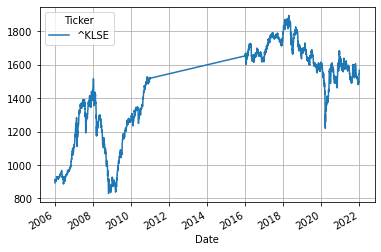

upward  55.72139303482587% out of 2010 total datasize


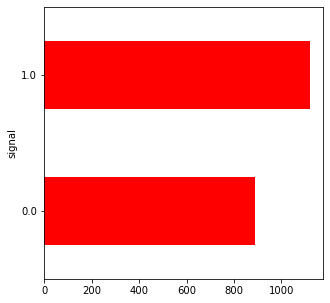

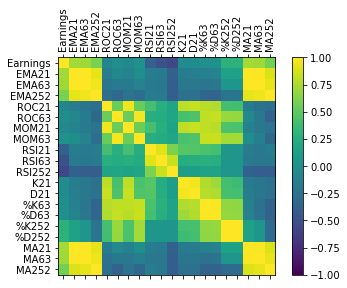

In [17]:
daily_close_px = datas[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')
daily_close_px.plot(grid=True)
plt.show()

fig = plt.figure()
fig.set_size_inches(5,5)
data_s = datasubs.groupby(['signal']).size()
names=['Earnings','EMA21','EMA63','EMA252','ROC21','ROC63','MOM21','MOM63','RSI21','RSI63','RSI252','K21','D21','%K63','%D63','%K252','%D252','MA21','MA63','MA252']

print("upward  {}% out of {} total datasize".format(100* data_s[1]/(data_s[1]+data_s[0]), data_s[1]+data_s[0]))
plot = data_s.plot(kind='barh', color='red')
X=datasubs.drop(['signal'], axis=1)
y=datasubs['signal']



correlations = X.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 90)
ax.set_yticklabels(names)
plt.show()

In [18]:
forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

          Importance
ROC21       1.781204
%K21        1.869381
RSI21       1.874985
%D21        2.009535
MOM21       2.231804
RSI63       2.396441
MA63        2.598035
Earnings    2.787243
EMA21       2.855710
MA21        2.910325
RSI252      2.914325
EMA63       2.978108
%K63        3.071046
EMA252      3.220992
%D63        4.120624
MA252       4.683959
ROC63      10.368095
MOM63      11.285701
%K252      14.485589
%D252      19.556898


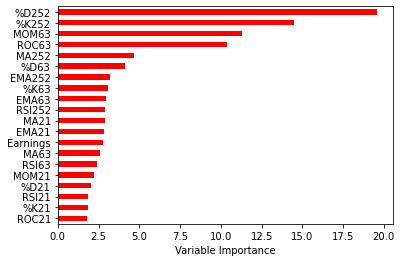

In [19]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
print(Importance.sort_values('Importance', axis=0, ascending=True))
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
split_date = '2011-01-01'
X_1=datasub.drop(['signal'],axis=1)
idx = pd.IndexSlice
X_train = X_1.loc[idx[:, :split_date], :]
X_test = X_1.loc[idx[:, split_date:], :]
Y_train = y[y.index.get_level_values("Date") < split_date]
Y_test = y[y.index.get_level_values("Date") >= split_date]
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
from sklearn.preprocessing import RobustScaler
X_train_1=X_train.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)
X_test_1=X_test.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

rs = RobustScaler()
rs.fit(X_train_1)
X_train_std = rs.transform(X_train_1)
X_test_std = rs.transform(X_test_1)

(540, 28) (540,)
(1470, 28) (1470,)


In [22]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

                      Open     High      Low    Close  Adj Close       Volume  \
Ticker Date                                                                     
^KLSE  2008-10-28   837.69   837.69   801.27   832.44     832.44  512472000.0   
       2008-10-29   850.25   850.25   821.75   829.41     829.41  466909900.0   
       2008-10-30   830.44   857.85   826.91   853.56     853.56  359169600.0   
       2008-10-31   848.60   869.32   848.60   863.61     863.61  551642400.0   
       2008-11-03   867.04   900.18   867.04   899.35     899.35  485047400.0   
...                    ...      ...      ...      ...        ...          ...   
       2010-12-24  1516.05  1516.44  1510.70  1511.58    1511.58  121900100.0   
       2010-12-27  1511.90  1513.23  1509.64  1511.72    1511.72   45783400.0   
       2010-12-28  1510.98  1525.99  1509.55  1517.44    1517.44   45943700.0   
       2010-12-29  1520.45  1526.93  1520.19  1524.34    1524.34   91008400.0   
       2010-12-30  1527.09  

In [23]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
    cv_results =cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.985185 (0.016144)
CART: 0.977778 (0.021596)
SVM: 0.970370 (0.022222)
RF: 0.990741 (0.009259)
NB: 0.950000 (0.029918)


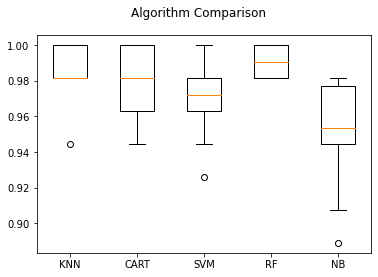

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
predy=rf.fit(X_train_std, Y_train)

In [26]:
predr= rf.predict(X_test_std)


In [27]:
print(accuracy_score(Y_test, predr))
print(confusion_matrix(Y_test, predr))
print(classification_report(Y_test, predr))

0.7278911564625851
[[393 372]
 [ 28 677]]
              precision    recall  f1-score   support

         0.0       0.93      0.51      0.66       765
         1.0       0.65      0.96      0.77       705

    accuracy                           0.73      1470
   macro avg       0.79      0.74      0.72      1470
weighted avg       0.80      0.73      0.72      1470



In [28]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix,f1_score

def pltcm(ax, y_test, y_pred, classes, title, th=0.7, cmap=plt.cm.Reds):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tickmarks = np.arange(len(classes))
    ax.set_xticks(tickmarks)
    ax.set_yticks(tickmarks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')

def pltauc(ax, y_train, y_pred, y_test, y_tpred, th=0.7):

    y_predl = (y_pred>th).astype(int)
    y_tpredl  = (y_tpred>th).astype(int)

    fpr_tr, tpr_tr, _ = roc_curve(y_train,y_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    acc_tr = accuracy_score(y_train, y_predl)

    fpr_ts, tpr_ts, _ = roc_curve(y_test,y_tpred)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    acc_ts = accuracy_score(y_test, y_tpredl)

    ax.plot(fpr_tr, tpr_tr)
    ax.plot(fpr_ts, tpr_ts)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_tr, roc_auc_tr)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_ts, roc_auc_ts)
    ax.legend([train_text, test_text])

def result(es,threshold,X_train,X_test,y_train,y_test):
    y_pred = es.predict(X_train)
    y_tpred = es.predict(X_test)

    fig,ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    pltcm(ax[0],  y_train, y_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    pltcm(ax[1],  y_test, y_tpred,   [0,1], 'Confusion matrix (TEST)', threshold)
    pltauc(ax[2], y_train, y_pred, y_test, y_tpred, threshold)
    plt.tight_layout()
    plt.show()
    
def btf1(es,X_test,y_test):
    thresholds = np.linspace(0.3,0.6,100)
    y_tpred = es.predict(X_test)
    score_set = []
    index_threshold = 0
    sum_score = 0
    for threshold in thresholds:
        y_tpred1  = (y_tpred > threshold).astype(int)
        score = f1_score(y_test, y_tpred1)
        score_set.append(score)
    for i in range(95):
        temp = sum(score_set[i:i+5])
        if temp > sum_score:
            sum_score = temp
            index_threshold = i+2 # the average threshold
    return thresholds[index_threshold],sum_score/5

def testf1(es,bestthreshold,X_test,y_test):
    y_tpred = es.predict(X_test)
    y_tpred1  = (y_tpred > bestthreshold).astype(int)
    score = f1_score(y_test, y_tpred1)
    return score

test f1: 0.7719498289623717 train f1: 1.0


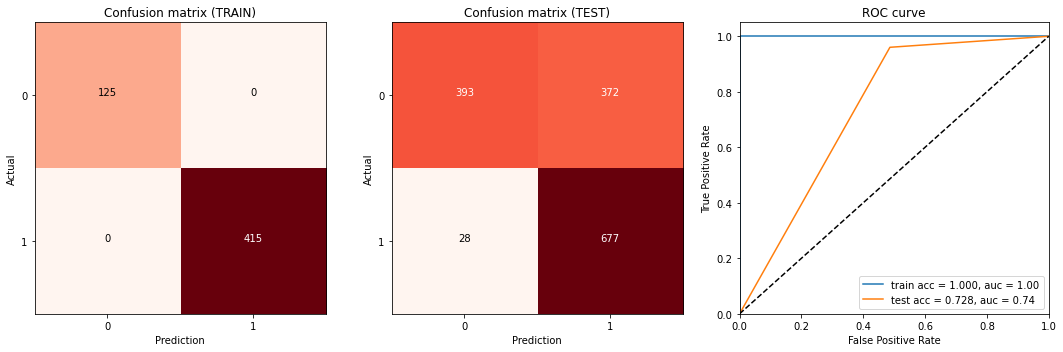

In [29]:
bestthreshold,bestf1 = btf1(rf,X_train_std, Y_train)
testf1 = testf1(rf,bestthreshold,X_test_std,Y_test)
print('test f1:',testf1,'train f1:',bestf1)
result(rf,bestthreshold,X_train_std,X_test_std, Y_train,Y_test)

signal_pred  signal_actual  Market Returns  Actual Returns  \
Ticker Date                                                                     
^KLSE  2016-01-04          1.0            1.0             NaN             NaN   
       2016-01-05          1.0            1.0        0.007457        0.007457   
       2016-01-06          1.0            1.0        0.001363        0.001363   
       2016-01-07          1.0            1.0       -0.007698       -0.007698   
       2016-01-08          1.0            1.0        0.001498        0.001498   

                   Strategy Returns  
Ticker Date                          
^KLSE  2016-01-04               NaN  
       2016-01-05          0.007457  
       2016-01-06          0.001363  
       2016-01-07         -0.007698  
       2016-01-08          0.001498

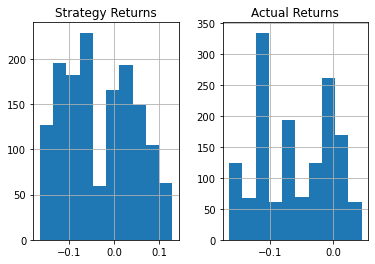

In [30]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_test.index)
backtestdata['signal_pred'] = predr
backtestdata['signal_actual'] = Y_test
backtestdata['Market Returns'] = X_test['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
# backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
backtestdata.head()

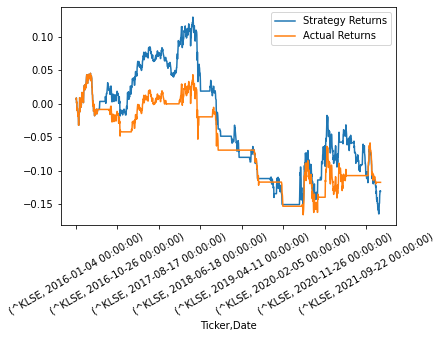

In [31]:
ax = backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
plt.xticks(rotation=30)
plt.show()

In [32]:
backtestdata.to_excel('Backtest.xlsx', index=True)

## Train Dataset


signal_pred  signal_actual  Market Returns  Actual Returns  \
Ticker Date                                                                     
^KLSE  2008-10-28          0.0            0.0             NaN             NaN   
       2008-10-29          0.0            0.0       -0.003640            -0.0   
       2008-10-30          0.0            0.0        0.029117             0.0   
       2008-10-31          0.0            0.0        0.011774             0.0   
       2008-11-03          0.0            0.0        0.041384             0.0   

                   Strategy Returns  
Ticker Date                          
^KLSE  2008-10-28               NaN  
       2008-10-29              -0.0  
       2008-10-30               0.0  
       2008-10-31               0.0  
       2008-11-03               0.0

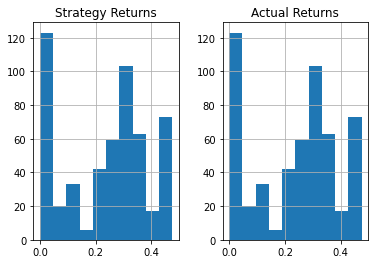

In [33]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtraindata = pd.DataFrame(index=X_train.index)
backtraindata['signal_pred'] = rf.predict(X_train_std)
backtraindata['signal_actual'] = Y_train
backtraindata['Market Returns'] = X_train['Close'].pct_change()
backtraindata['Actual Returns'] = backtraindata['Market Returns'] * backtraindata['signal_actual'].shift(1)
backtraindata['Strategy Returns'] = backtraindata['Market Returns'] * backtraindata['signal_pred'].shift(1)
backtraindata[['Strategy Returns','Actual Returns']].cumsum().hist()
# backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
backtraindata.head()

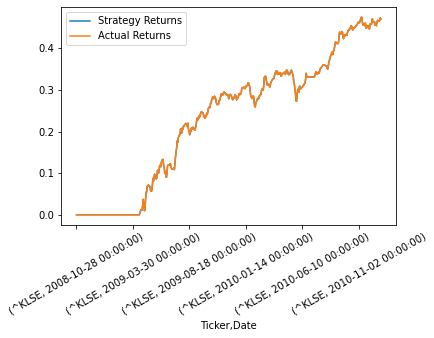

In [34]:
ay = backtraindata[['Strategy Returns','Actual Returns']].cumsum().plot()
plt.xticks(rotation=30)
plt.show()

In [35]:
backtraindata.to_excel('Backtrain.xlsx', index=True)